In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# 生成數據
# 變數說明 (括號內代表說明)
# feature: 特徵 (氣溫與濕度)
# class: 類別 (明天會不會下雨)
# n_cluster_per_class: 每一個類別的點都「緊密分布」分布在 n 個區塊內
# n_redundant: 沒有用的特徵數量, 能被表示成其他特徵的線性組合。(包含在 feature 數量當中, 不會因為設 100, 就多出 100 個額外特徵)
# n_informative: 有用的特徵數量
Coord, Type = make_classification(n_samples=200, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, n_informative=2)
# 執行完之後看一下變數的樣貌


In [4]:
Coord_train, Coord_test, Type_train, Type_test = train_test_split(Coord, Type)

# 創建 KNN 分類器
knn = KNeighborsClassifier(n_neighbors=5)
# 訓練模型
knn.fit(Coord_train, Type_train)

# 預測
Type_pred = knn.predict(Coord_test)

# 評估模型 (非必要)
accuracy = accuracy_score(Type_test, Type_pred)
print(f"準確率: {accuracy:.2f}")
print("\n分類資訊:")
print(classification_report(Type_test, Type_pred))

準確率: 0.84

分類資訊:
              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.80      0.87      0.83        23

    accuracy                           0.84        50
   macro avg       0.84      0.84      0.84        50
weighted avg       0.84      0.84      0.84        50



<Figure size 800x800 with 0 Axes>

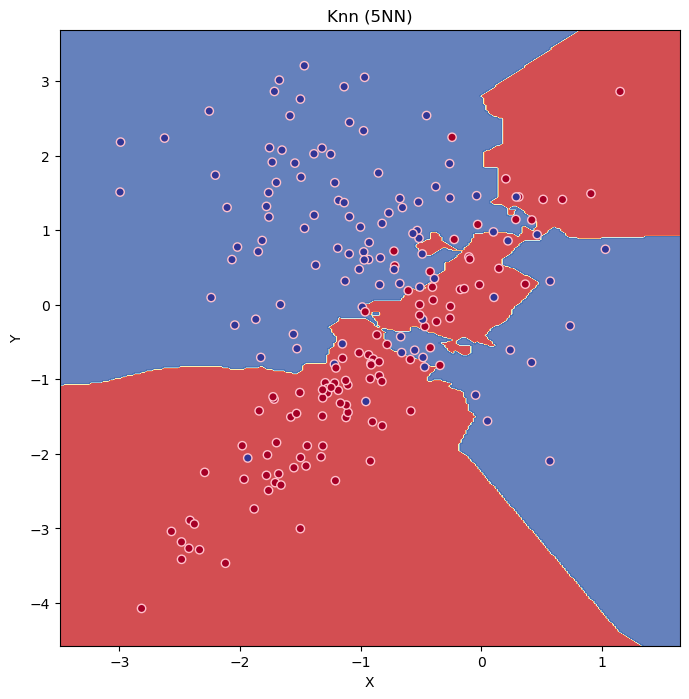

In [5]:
# 繪製決策邊界 (我會 AI 的口吻了! 這好像不值得高興)
# +- 0.5是為了拓寬, 不讓點在邊緣
plt.figure(figsize =(8, 8))
x_min, x_max = Coord[:, 0].min() - 0.5, Coord[:, 0].max() + 0.5
y_min, y_max = Coord[:, 1].min() - 0.5, Coord[:, 1].max() + 0.5

# meshgrid 方便畫格子點, 有附上圖片 meshgrid.png
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
# 預測所有點的類別
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
# xx.shape 跟 yy.shape 是一樣的, 看 meshgrid.png
# reshape 之後用來畫圖
Z = Z.reshape(xx.shape)



plt.figure(figsize =(8, 8))
# 將所有點預測的結果顯示出來並且畫上顏色 (每步 0.02, 非常緻密)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
# 把所有資料繪製到圖片上面 (x, y, 顏色 = 類型, RdYlBu = red yellow blue)
plt.scatter(Coord[:, 0], Coord[:, 1], c=Type, cmap=plt.cm.RdYlBu, edgecolor='pink')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Knn (5NN)')
plt.show()

In [6]:
# 獲取鄰居的索引和距離
distances, indices = knn.kneighbors(Coord_test)

print("\n前5個測試點的neighbor index:")
print(indices[:5])

print("\n前5個測試點到它鄰居的距離:")
print(distances[:5])

print("\n Sparse Matrix")
sparse_distances = knn.kneighbors_graph(Coord_test)
print(sparse_distances.toarray())
sparse_distances=sparse_distances.toarray()


前5個測試點的neighbor index:
[[142  92  45   5  22]
 [ 20  15  69  68  37]
 [ 18  82  72 108  98]
 [ 87 124 119  48   9]
 [ 87 124 119  83  73]]

前5個測試點到它鄰居的距離:
[[0.24972379 0.2694883  0.30193465 0.30366782 0.32327275]
 [0.19222429 0.25098702 0.33653916 0.36033176 0.39340404]
 [0.08092276 0.28326112 0.28443996 0.28941254 0.34192497]
 [0.25806088 0.29216293 0.3610446  0.49590788 0.50389933]
 [0.15572406 0.2402374  0.2716324  0.38361488 0.40361226]]

 Sparse Matrix
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]
